<a href="https://colab.research.google.com/github/NicoGajardo/MachineLearning/blob/main/Tarea_%20K_means_USArrest_Desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtencion de los datos

USArrests es un conjunto de datos clásico que viene incluido en R por defecto. Se utiliza frecuentemente en análisis exploratorio, aprendizaje no supervisado y reducción de dimensionalidad. A continuación te doy una descripción clara y ordenada que puedes usar para tus clases.

⸻

📦 Descripción del conjunto de datos USArrests

USArrests contiene datos sobre arrestos por diversos crímenes violentos en los 50 estados de EE.UU. en el año 1973.

⸻

🧾 Estructura del dataset
* Observaciones (filas): 50 (uno por cada estado de EE.UU.)
* Variables (columnas): 4
* Tipo de datos: Numérico continuo

⸻

📋 Variables

Variable	Descripción
Murder	Tasa de arrestos por asesinato (por cada 100,000 habitantes)
Assault	Tasa de arrestos por asalto (por cada 100,000 habitantes)
UrbanPop	Porcentaje de la población que vive en zonas urbanas
Rape	Tasa de arrestos por violación (por cada 100,000 habitantes)


⸻

📍 Ejemplo de uso en R

head(USArrests)
summary(USArrests)

Puedes usarlo para:
* Análisis exploratorio
* Clustering (ej: k-means)
* PCA (análisis de componentes principales)
* Visualización de datos
* Escalamiento y normalización

⸻

💡 Notas didácticas
* Las variables están en escalas distintas, por lo que antes de aplicar PCA o clustering se recomienda escalar los datos (ej: scale(USArrests)).
* Es útil para explicar el concepto de distancia euclidiana, espacio vectorial, y cómo el escalamiento afecta los resultados de algoritmos no supervisados.


In [ ]:
# load US Arrest data from a CSV file
import csv
URL="https://raw.githubusercontent.com/castudil/Machine-Learning/refs/heads/main/S12-K-means/USArrests.csv"
import pandas as pd
def load_data(url):
    """
    Load US Arrest data from a CSV file.

    Parameters:
    url (str): The URL of the CSV file.

    Returns:
    pd.DataFrame: A DataFrame containing the US Arrest data.
    """
    df = pd.read_csv(url, index_col=0)
    return df
df= load_data(URL)
# Display the first few rows of the DataFrame
print(df.head())
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)
# Display the columns of the DataFrame
print("Columns in the DataFrame:", df.columns.tolist())
# Display the data types of the columns
print("Data types of the columns:\n", df.dtypes)
# Display summary statistics of the DataFrame
print("Summary statistics of the DataFrame:\n", df.describe())



            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6
Shape of the DataFrame: (50, 4)
Columns in the DataFrame: ['Murder', 'Assault', 'UrbanPop', 'Rape']
Data types of the columns:
 Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object
Summary statistics of the DataFrame:
          Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


# preparacion de los datos

* Escalar datos usando z-score
* no hay datos faltantes
* remover datos atipicos

# 📐 Z-score (o puntaje estándar)

El z-score mide cuántas desviaciones estándar está un valor respecto al promedio de una distribución.

$$ z = \frac{x - \mu}{\sigma} $$

Donde:
* x es el valor original,
* $ \mu $ es la media,
* $ \sigma $ es la desviación estándar.

⸻

💡 Interpretación:
* z = 0: el valor está en la media.
* z > 0: el valor está sobre la media.
* z < 0: el valor está bajo la media.

⸻

📌 Uso común:
* Estandarización de datos (para PCA, clustering, regresión, etc.)
* Detección de outliers
* Comparación entre variables con diferentes escalas

In [ ]:
# z-score
from sklearn.preprocessing import StandardScaler
def z_score_normalization(df):
    """
    Normalize the DataFrame using z-score normalization.

    Parameters:
    df (pd.DataFrame): The DataFrame to normalize.

    Returns:
    pd.DataFrame: A DataFrame with z-score normalized values.
    """
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df)
    return pd.DataFrame(normalized_data, index=df.index, columns=df.columns)
df_normalized = z_score_normalization(df)
# Display the first few rows of the normalized DataFrame
print("Normalized DataFrame:\n", df_normalized.head())
# Display the shape of the normalized DataFrame
print("Shape of the normalized DataFrame:", df_normalized.shape)
# Display the columns of the normalized DataFrame
print("Columns in the normalized DataFrame:", df_normalized.columns.tolist())
# Display the data types of the columns in the normalized DataFrame
print("Data types of the columns in the normalized DataFrame:\n", df_normalized.dtypes)
# Display summary statistics of the normalized DataFrame
print("Summary statistics of the normalized DataFrame:\n", df_normalized.describe())


Normalized DataFrame:
               Murder   Assault  UrbanPop      Rape
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814
Shape of the normalized DataFrame: (50, 4)
Columns in the normalized DataFrame: ['Murder', 'Assault', 'UrbanPop', 'Rape']
Data types of the columns in the normalized DataFrame:
 Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object
Summary statistics of the normalized DataFrame:
              Murder       Assault      UrbanPop          Rape
count  5.000000e+01  5.000000e+01  5.000000e+01  5.000000e+01
mean  -7.105427e-17  1.387779e-16 -4.396483e-16  8.593126e-16
std    1.010153e+00  1.010153e+00  1.010153e+00  1.010153e+00
min   -1.620693e+00 -1.524362e+00 -2.340661e+00 -1.502548e+00
25%   -8.611383e-01 -7.486054e-01 -7.704

/Users/cesar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cesar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cesar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/cesar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


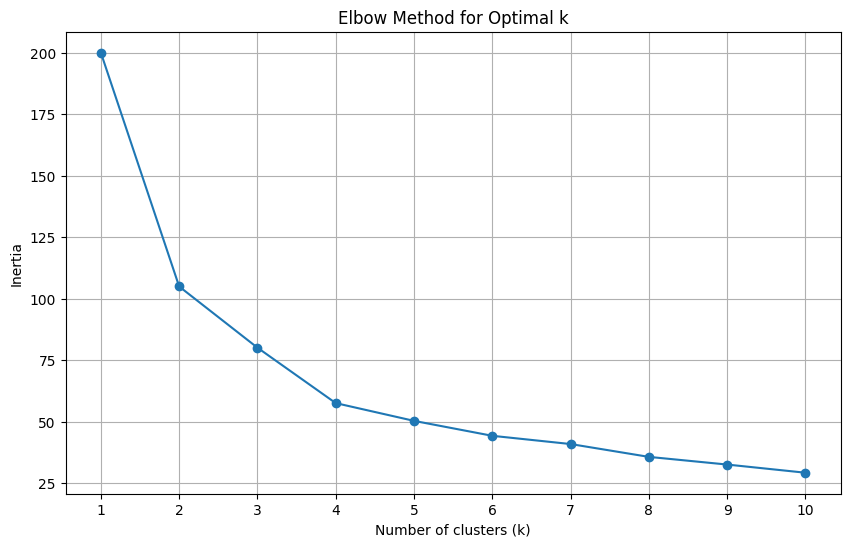

Inertia values for each k: [200.0, 104.96163315756871, 80.08569526137276, 57.55425863091105, 50.33327385184907, 44.25980763811231, 40.91266722247346, 35.69587706333373, 32.57509993011514, 29.253498916734607]


In [ ]:
# elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def elbow_method(df, max_k=10):
    """
    Apply the elbow method to determine the optimal number of clusters.

    Parameters:
    df (pd.DataFrame): The DataFrame to cluster.
    max_k (int): The maximum number of clusters to test.

    Returns:
    list: A list of inertia values for each k.
    """
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.show()

    return inertia
inertia_values = elbow_method(df_normalized, max_k=10)
# Display the inertia values
print("Inertia values for each k:", inertia_values)


# Modelamiento de datos

se aplica k-means para encontrar los grupos.

In [ ]:
# clustering using KMeans
from sklearn.cluster import KMeans
def kmeans_clustering(df, n_clusters=3):
    """
    Perform KMeans clustering on the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to cluster.
    n_clusters (int): The number of clusters to form.

    Returns:
    pd.Series: A Series containing the cluster labels for each row.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    return pd.Series(kmeans.labels_, index=df.index)
df['Cluster'] = kmeans_clustering(df_normalized, n_clusters=4)
# Display the first few rows of the DataFrame with cluster labels
print("DataFrame with cluster labels:\n", df.head())
# Display the unique cluster labels
print("Unique cluster labels:", df['Cluster'].unique())
# Display the number of samples in each cluster
print("Number of samples in each cluster:\n", df['Cluster'].value_counts())


DataFrame with cluster labels:
             Murder  Assault  UrbanPop  Rape  Cluster
Alabama       13.2      236        58  21.2        1
Alaska        10.0      263        48  44.5        2
Arizona        8.1      294        80  31.0        2
Arkansas       8.8      190        50  19.5        1
California     9.0      276        91  40.6        2
Unique cluster labels: [1 2 0 3]
Number of samples in each cluster:
 Cluster
0    16
2    13
3    13
1     8
Name: count, dtype: int64


/Users/cesar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Queremos pegar las etiquetas al dataset original para poder:

⸻

✅ Interpretar los resultados del agrupamiento
* Al agregar las etiquetas (clusters) al dataset, podemos:
* Ver a qué grupo pertenece cada observación.
* Comparar los valores originales de las variables entre grupos.
* Visualizar los clusters en gráficos (por ejemplo, en PCA o t-SNE).

⸻

✅ Enriquecer el análisis exploratorio
* Nos permite:
* Calcular promedios por grupo, frecuencias, etc.
* Ver si los grupos tienen sentido práctico (por ejemplo, en perfiles de pacientes, clientes, etc.).

⸻

✅ Usar los clusters como nuevas variables
* Las etiquetas de cluster pueden servir como input para modelos supervisados o segmentación de usuarios.

⸻

🧠 En resumen:

Pegar las etiquetas al dataset original nos permite contextualizar, analizar e interpretar los grupos encontrados, vinculándolos con los datos reales.


In [ ]:
# append groups to dataset
def append_groups_to_dataset(df, groups):
    """
    Append the cluster groups to the original DataFrame.

    Parameters:
    df (pd.DataFrame): The original DataFrame.
    groups (pd.Series): The cluster labels.

    Returns:
    pd.DataFrame: The original DataFrame with an additional column for cluster labels.
    """
    df['Cluster'] = groups
    return df
df_with_groups = append_groups_to_dataset(df, df['Cluster'])
# Display the first few rows of the DataFrame with cluster labels
print("DataFrame with cluster labels:\n", df_with_groups.head())
# Display the shape of the DataFrame with cluster labels
print("Shape of the DataFrame with cluster labels:", df_with_groups.shape)
# Display the columns of the DataFrame with cluster labels
print("Columns in the DataFrame with cluster labels:", df_with_groups.columns.tolist())
# Display the data types of the columns in the DataFrame with cluster labels
print("Data types of the columns in the DataFrame with cluster labels:\n", df_with_groups.dtypes)
# Display summary statistics of the DataFrame with cluster labels
print("Summary statistics of the DataFrame with cluster labels:\n", df_with_groups.describe())
# Save the DataFrame with cluster labels to a CSV file
#df_with_groups.to_csv('USArrests_with_clusters.csv')


DataFrame with cluster labels:
             Murder  Assault  UrbanPop  Rape  Cluster
Alabama       13.2      236        58  21.2        1
Alaska        10.0      263        48  44.5        2
Arizona        8.1      294        80  31.0        2
Arkansas       8.8      190        50  19.5        1
California     9.0      276        91  40.6        2
Shape of the DataFrame with cluster labels: (50, 5)
Columns in the DataFrame with cluster labels: ['Murder', 'Assault', 'UrbanPop', 'Rape', 'Cluster']
Data types of the columns in the DataFrame with cluster labels:
 Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
Cluster       int32
dtype: object
Summary statistics of the DataFrame with cluster labels:
          Murder     Assault   UrbanPop       Rape    Cluster
count  50.00000   50.000000  50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000   1.460000
std     4.35551   83.337661  14.474763   9.366385   1.198809
min     0.80000   

# Interpretaion de los datos

/Users/cesar/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cesar/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cesar/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cesar/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping w

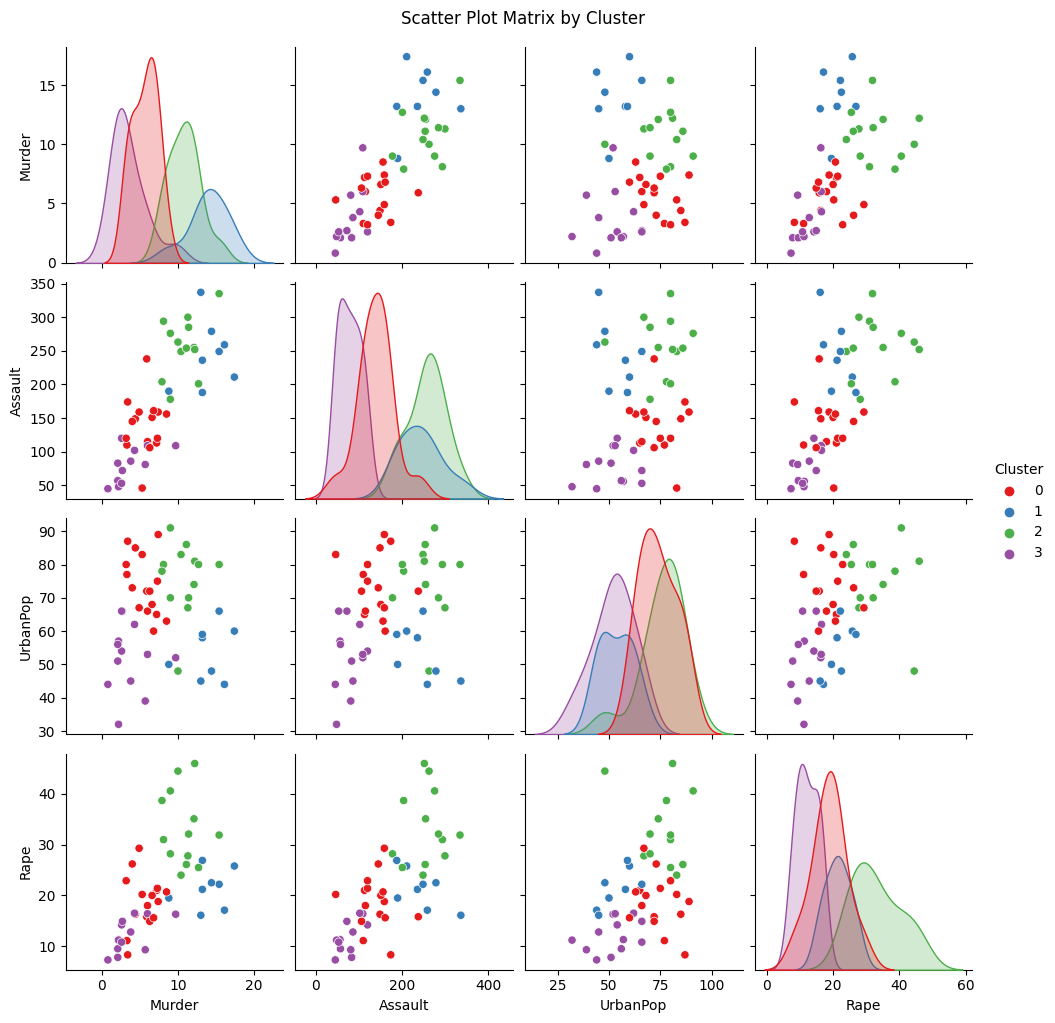

In [ ]:
# plot scatter plot matrix and painting points by cluster
import matplotlib.pyplot as plt
import seaborn as sns
def plot_scatter_matrix(df, cluster_col='Cluster'):
    """
    Plot a scatter plot matrix of the DataFrame, coloring points by cluster.

    Parameters:
    df (pd.DataFrame): The DataFrame to plot.
    cluster_col (str): The column name containing cluster labels.
    """
    sns.pairplot(df, hue=cluster_col, palette='Set1', markers='o')
    plt.suptitle('Scatter Plot Matrix by Cluster', y=1.02)
    plt.show()
plot_scatter_matrix(df_with_groups, cluster_col='Cluster')


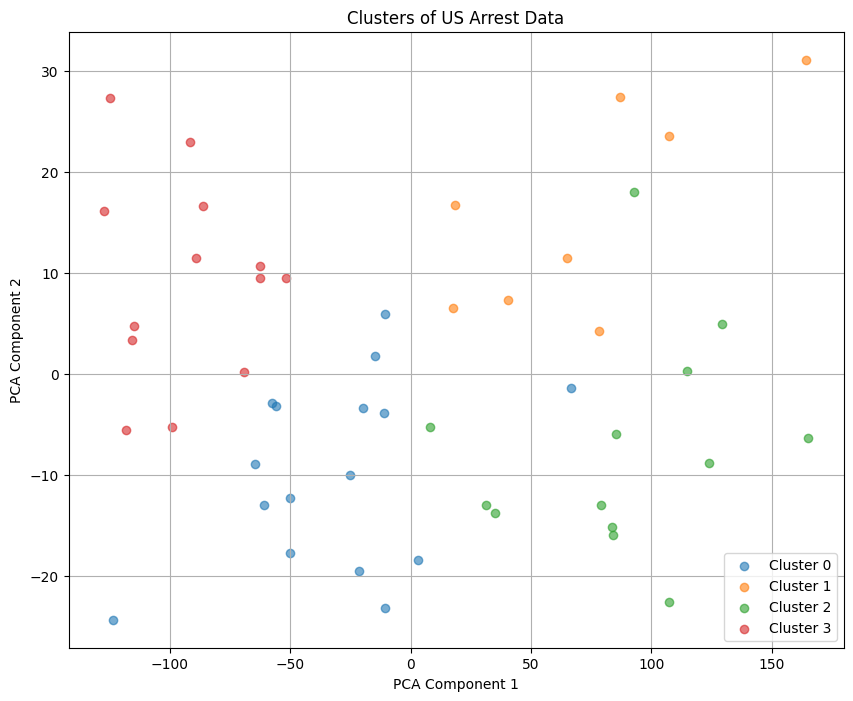

In [ ]:
# plot clusters, using PCA for dimensionality reduction, and diffent shapes and colors for different clusters
from sklearn.decomposition import PCA
def plot_clusters(df, n_clusters=4):
    """
    Plot the clusters using PCA for dimensionality reduction.

    Parameters:
    df (pd.DataFrame): The DataFrame with cluster labels.
    n_clusters (int): The number of clusters.
    """
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df.drop(columns='Cluster'))

    plt.figure(figsize=(10, 8))
    for cluster in range(n_clusters):
        cluster_data = reduced_data[df['Cluster'] == cluster]
        # plot using different shapes and colors for each cluster
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

    plt.title('Clusters of US Arrest Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid()
    plt.show()
plot_clusters(df_with_groups, n_clusters=4)

# Conclusiones

* Analizamos datos estadísticos de crímenes en Estados Unidos,
* Estos datos no tienen etiquetas
* Intentamos estimar las etiquetas a partir de la información estadística que contenía cada estado
* Esta estimación se hizo a través de un algoritmo de agrupamiento de datos llamado K means
* El algoritmo necesita un valor K que corresponde al número de grupos a identificar
* Utilizamos la técnica del codo para determinar el valor de K adecuado
* Esta técnica nos sugiere que K=4  es un valor razonable
* agrupamos los datos utilizando k-means con k=4
* Graficaficamos los datos utilizando una matriz de gráficos de dispersión.
* Utilizamos una visualización PCA para ver una proyección en dos dimensiones.

